# $\color{purple}{\text{Understanding Missing Data and How to Deal with It (Part 1)}}$
## $\color{purple}{\text{Introduction to Missingness}}$

### $\color{purple}{\text{Colab Environmental Setup}}$
We will be saving and reading files. If you are following along with me and use colab. It will be a lot easier to mount your google drive.


### $\color{purple}{\text{Libraries for this lesson}}$

In [2]:
import pandas as pd
import numpy as np

## $\color{purple}{\text{Nomenclature}}$

* columns
  * features
  * variables

* rows
  * observations
  * cases
  * records

Below is a little mnemonic Dataframe that encapsulates these synonyms

In [3]:
pd.DataFrame(np.random.randn(4, 3), columns=['columns', 'features', 'variables'], index=['rows', 'observations', 'cases', 'records'])

,columns,features,variables
rows,0.821113,-1.569125,-0.526226
observations,1.768810,0.842561,-2.070881
cases,0.533786,-1.484466,1.100254
records,-0.718479,-0.399845,0.911505


## $\color{purple}{\text{Identifying Missing Features}}$
$\color{red}{\Large{\text{ ⚠}}}$ Always examine your data and determine what are missing values

  * Values that are missing:
      * CSV files with blanks
      * NULL in a database
      * Impossible Values
  * Values that are non necessarily missing:
      * N/A
        * Not Available - missing
        * Not Applicable - maybe not missing
      * NaN

| Patient | Sex| Pregnant | Testicular Cancer |
|---------|----|----------|-------------------|
| Mary    | F  |  N       |   N/A             |
| John    | M  |  N/A     |    N              |


Is N/A really missing or just Not Applicable in this case?

### $\color{red}{\Large{\text{ ⚠}}}$ Remember NaN really stands for Not a Number. 

Many python tools use NaN to denote missing values in a table. But it does not necessarily mean the value is missing. A NaN could be incurred from bad processing somewhere in the pipeline or could even be expected.

However, for the rest of this we will use NaN in a `pandas` `DataFrame` to denote a missing value.

In [4]:
df = pd.DataFrame({'a': [1,2,3], 'b': [1, -1, 4]})
df['sqrt_b']=np.sqrt(df.b)

/home/unpingco/.conda/envs/py39/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
df

,a,b,sqrt_b
0,1,1,1.0
1,2,-1,NaN
2,3,4,2.0


## $\color{purple}{\text{Missingness Mechanism vs. Pattern}}$

* Missingness Mechanism (Is an observation complete?)
  * Missing Completely at Random (MCAR)
  * Missing at Random (MAR)
  * Missing not at Random (MNAR)

* Missingness Pattern (What features are missing within an observation?)
  * Uniform
  * Monotonic
  * Random

## $\color{purple}{\text{Missingness Patterns}}$
No standard terminology but here is one version:
* If a row has missing data, the same features are always missing
#### $\color{purple}{\text{Uniform}}$

| Height | Weight | Sex  | Temperature | Pulse | BP Systolic |
| ------ | ------ | ---- | ----------- | ----- | ----------- |
| NaN    | NaN    | M    | 98.6        | 70    | NaN         |
| 61     | 120    | F    | 98.2        | 77    | 110         |
| 65     | 160    | M    | 99.1        | 62    | 140         |
| NaN    | NaN    | F    | 98.9        | 55    | NaN         |

* If a feature is missing, the rest of the features in the row are missing

<font color='red'>
The monotone missing pattern is where the set of observed rows  in one column is
always a subset of the set of observed rows for another column. This means that the columns can be ordered by the respective number of missing elements (least-to-greatest) in each column. When reordered this way, a missing element along any row/column implies that the rest of the columns to the right along that row are also missing.
</font> 


#### $\color{purple}{\text{Monotonic}}$

| Height | Weight | Sex  | Temperature | Pulse | BP Systolic |
| ------ | ------ | ---- | ----------- | ----- | ----------- |
| 71     | 190    | M    | 98.6        | 70    | 120         |
| 61     | 120    |      | NaN         | NaN   | NaN         |
| 65     | 160    | M    | 99.1        | 62    | 140         |
| 63     | 125    | F    | 98.9        | NaN   | NaN         |

* No particular pattern to the missingness
#### $\color{purple}{\text{Random}}$

| Height | Weight | Sex  | Temperature | Pulse | BP Systolic |
| ------ | ------ | ---- | ----------- | ----- | ----------- |
| 71     | NaN    | M    | 98.6        | NaN   | 120         |
| 61     | 120    | F    | 98.2        | 77    | 110         |
| 65     | NaN    | M    | NaN         | NaN   | 140         |
| 63     | 125    | F    | 98.9        | 55    | 100         |






## $\color{purple}{\text{Missingness Mechanisms}}$

Rubin’s taxonomy:
  * MCAR: the probability of data being missing does not depend on the values
observed or unobserved variables
  * MAR: the probability of data being missing does not depend on the unobserved
data, conditional on the observed data
  * MNAR: the probability of data being missing depends on the unobserved data,
**even after conditioning on the observed data** 

Source: [Missing data in propensity
score analysis](
https://www.ucl.ac.uk/population-health-sciences/sites/population_health_sciences/files/nash-missing_dataps_clemence_leyret.pdf)

## $\color{purple}{\text{Why Should I Care? Missing is Missing}}$
 * MCAR can apply deletion
 * MAR can use imputation
 * MNAR requires looking outside the data to handle

$\color{red}{\text{⚠}}$ Many research papers purport to be able to impute MNAR data. Do not believe them, most of the methodology is the claims is faulty.

## $\color{purple}{\text{Simple Case of Unimputatble NMAR Data}}$
The following example is a simple example of an MNAR mechanism. 


This data set is a fictitious scenario where 100 people were surveyed to pick a number between 1 and 10. Due to some unknown mechanism even numbers on occasionally lost. 

* `first_name` - first name of person polled
* `number` - They were asked to pick a number between 1-10
* missingness - with a small probability, numbers are missing if they are odd

In [7]:
df=pd.read_csv('../data/favorite_numbers.csv')
df.head(20)

,first_name,number
0,Salvatore,6.0
1,Scott,NaN
2,Anthony,8.0
3,Anthony,NaN
4,James,3.0
5,Eric,8.0
6,Winifred,9.0
7,Pamela,3.0
8,Elizabeth,8.0
9,Kimberly,6.0


### $\color{purple}{\text{What can we tell about the missing data ?}}$
* Data itself can tell us nothing
* Outside knowledge can help
* More data can help

Based on the data set alone, there is knowledge as to what the missing values are aside from that they are even. 
One might assume that since most people tend to pick numbers from the middle hence you might infer that the numbers 4 and 6 are more common. However, this is based on knowledge outside the data set itself. Furthermore you might have statistics from outside sources indicating gender preference.


<AxesSubplot:>

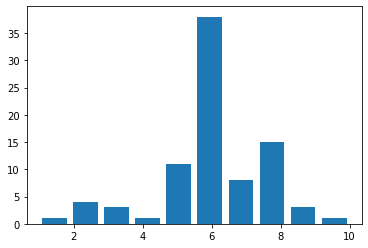

In [10]:
df.number.hist(grid=False,rwidth=.8)

In [11]:
df.isnull().sum()

first_name     0
number        15
dtype: int64

Suppose now we have their last names. We see the surnames and might be able to apply additional domain knowledge to better determine how likely the distribution of the missing numbers might be.

Traditionally, in Chinese culture, 6 and 8 are considered lucky where 4 and 10 are considered unlucky.

In [13]:
df=pd.read_csv('../data/favorite_numbers_full_name.csv')
df.head(20)

,first_name,last_name,number
0,Salvatore,Lin,6.0
1,Scott,Qian,NaN
2,Anthony,Zhuang,8.0
3,Anthony,Ch'iu,NaN
4,James,Chung,3.0
5,Eric,Ma,8.0
6,Winifred,Hsin,9.0
7,Pamela,Ren,3.0
8,Elizabeth,Luo,8.0
9,Kimberly,Tuan,6.0


array([[<AxesSubplot:title={'center':'number'}>]], dtype=object)

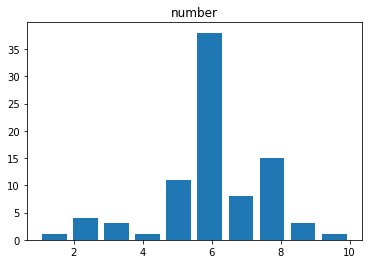

In [15]:
df.hist(grid=False, rwidth=.8)

array([[<AxesSubplot:title={'center':'number'}>]], dtype=object)

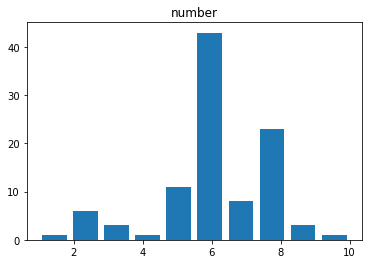

In [16]:
full_df=pd.read_csv('../data/favorite_numbers_full.csv')
full_df.hist(grid=False,rwidth=.8)

## $\color{purple}{\text{Key Takeaways}}$
* Be sure to correctly identify what is truly missing
* The proper treatment of missing data requires identifying the type of missingness mechanism (MCAR, MAR, MNAR)
* Data missing due to MNAR requires domain knowledge to address